In [1]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import fg,bg,hl,color
vID.init(cwd0)

import tools4PytChem as t4pPC

#cancel the "last show-up" behaviour of Jupyter notebooks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

__author__ = "Thierry Leininger, LCPQ (CNRS-UT3 lab, Toulouse, France)"

/home/ctm/PytChem


**Start at:** Tuesday 05 December 2023, 19:23:37  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/PytChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

 # Harmonic Oscillator

## Introduction

<div class="intro">

In this project, we propose to solve the Schrödinger equation for the one-dimensional quantum harmonic oscillator and vizualise the corresponding solutions and some of their properties. As usual, the Schrödinger equation reads:

$$\hat{H}(x)\psi_v(x)=E_v\psi_v(x)$$

with $\hat{H}=\hat{T}+\hat{V}$

The kinetic energy is given by $ \hat{T}= \frac{\hat{p}^2}{2m} $ which, with $\hat{p}=- i\hbar \frac{\partial}{\partial \hat{x}}$, becomes


$$ \hat{T}=-\frac{\hbar^{2}}{2m} \frac{\partial}{\partial x^2}$$

In the case of the harmonic oscillator the potential energy of the particle is simply 
$$\hat{V} = \frac{1}{2}kx^2$$


Thus, the Schrodinger equation one has to solve is 
    
$$[-\frac{\hbar^{2}}{2m} \frac{\partial}{\partial x^2}+\frac{1}{2}kx^2]\psi_v(x) = E_v\psi_v(x)$$

</div>

<div class="exE">

- From now on, we will choose $\hbar=m=k=1$. Plot the corresponding harmonic potential.
</div>

Text(0.5, 1.0, 'Harmonic Potential vs. $x$')

Text(0.5, 0, '$x$')

Text(0, 0.5, '$V_{harmonic}$')

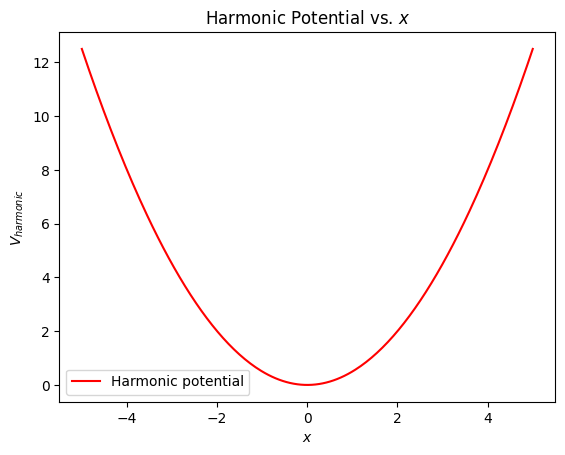

In [16]:
# insert your code here
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

#defining the function
def harmpot(x):
    """
    This function evaluates the harmonic potential of a given distance x        
    input: distance x
    output: the harmonic potential
    """
    k=1
    V=(1/2)*k*(x**2)
    return V

x=sp.symbols('x')

#lambdifying the function
_harmpot=sp.lambdify([x], harmpot(x))
#creating linspace
_x = np.linspace(-5.,5.,250)
#plotting
plt.plot(_x, _harmpot(_x), color='red', label="Harmonic potential")
plt.title('Harmonic Potential vs. $x$')
plt.xlabel("$x$")
plt.ylabel("$V_{harmonic}$")
plt.legend()
plt.show()


# Solutions of the Schrödinger Equation

<div class="intro">

As suggested above, the solutions of the Quantum Harmonic Oscillator depend on a (<i>vibrational</i>) quantum number $v$.

The energies ($ie$ eigenvalues) are given by

$$ E_v=(v+\frac{1}{2})\hbar\omega$$ with $v=0, 1, 2, ...$ and $\omega=\sqrt{(\frac{k}{m})}$


The corresponding wavefunctions ($ie$ eigenfunctions) are given by

$$\Psi_v=N_vH_ve^{-y^2/2}$$ where $N_v$ is the normalization factor, $H_v$ the <b>Hermite polynomial</b> and $y=(\frac{mk}{\hbar^2})^{1/4}x$.


The <b>Hermite polynomials</b> are defined using a recurrence relation
$$H_{v+1}=2yH_v-2vH_{v-1}$$
with $H_0=1$ and $H_1=2y$.


<div class="exE">

Code a `Hv(v,y)` function returning the evaluation of $v^{th}$ Hermite polynomial, $H_v$ at a given value $y$
</div>

In [19]:
# insert your code here

#setting the values for the constants and y
hbar=1
m=1
k=1
y=((m*k/(hbar**2))**(1/4))*x
#creating a list with the hermitian polynomials already given
H=[1,2*y]


def Hvp1(v,y):
    """
    This function evaluates the Hermitian polynomials at a given function y and level v and stores it in a list    
    input: -v: level
           -y:function
    output: the hermitian polinomial at the level v
    """
    if v==0:
        Hvplus1=1
    elif v==1:
        Hvplus1=2*y
    else:
        Hvplus1=(2*y*H[v-1])-(2*(v-1)*H[v-2])
        H.insert(v,Hvplus1)
    return Hvplus1

#evaluating the hermitian polinomials
for i in range(0,7):
    print(f"\nH{i}: {Hvp1(i,y)}")

def Hdef(v,y):
    """
    This function evaluates the Hermitian polynomials at a given function y and level v but DOES NOT store it    
    input: -v: level
           -y:function
    output: the hermitian polinomial at the level v
    """
    Hvplus1=(2*y*H[v-1])-(2*(v-1)*H[v-2])
    return Hvplus1





H0: 1

H1: 2.0*x

H2: 4.0*x**2 - 2

H3: 2.0*x*(4.0*x**2 - 2) - 8.0*x

H4: -24.0*x**2 + 2.0*x*(2.0*x*(4.0*x**2 - 2) - 8.0*x) + 12

H5: -16.0*x*(4.0*x**2 - 2) + 2.0*x*(-24.0*x**2 + 2.0*x*(2.0*x*(4.0*x**2 - 2) - 8.0*x) + 12) + 64.0*x

H6: 240.0*x**2 - 20.0*x*(2.0*x*(4.0*x**2 - 2) - 8.0*x) + 2.0*x*(-16.0*x*(4.0*x**2 - 2) + 2.0*x*(-24.0*x**2 + 2.0*x*(2.0*x*(4.0*x**2 - 2) - 8.0*x) + 12) + 64.0*x) - 120


<div class="exE">

Using the `hermite` function from `sympy`, print the first 6 Hermite polynomials and check your code written in the previous cell for a few values of <i>v</i> and <i>y</i>.
The results will be advantageoulsy presented in a table (see example below) beside the expression of the `hermite`polynomial.

<p style="text-align:center;"><img width="280" src = "./tableQHO.jpg"/></p>

</div>

In [21]:
#insert your code here

#creating the lists to be used in this cell
herm=[]
v=[]
herm_c=[]
herm_calc=[]
xj=[]
Hp=[]
x_range=[0.0,1.2,2.5,3.8,5.0]

#storing the values of the hermite function
for i in range (0,7):
    herm.insert(i,sp.hermite(i,x))
    v.insert(i,i)
    
#printing and comparing the values
for l in range(0,7):
    print(f"\nv={v[l]}  H_v={herm[l]}")
    H.append(herm[l])
    print("x     Hermite(x)     Hv(x)")
    for j in x_range:
        herm_csp=sp.hermite(v[l],j)
        if v[k]<=1:
            herm_cmf=Hdef(v[l],j)
            print(f"{j}     {herm_csp:.3f}          {herm_cmf}")
        else:
            herm_cmf=Hdef(v[l],j).subs({x:j})
            print(f"{j}     {herm_csp:.3f}          {herm_cmf:.3f}")

   


v=0  H_v=1
x     Hermite(x)     Hv(x)
0.0     1.000          128*x**6 - 960*x**4 + 1440*x**2 - 240
1.2     1.000          128*x**6 - 960*x**4 + 1440*x**2 - 237.6
2.5     1.000          128*x**6 - 960*x**4 + 1440*x**2 - 235.0
3.8     1.000          128*x**6 - 960*x**4 + 1440*x**2 - 232.4
5.0     1.000          128*x**6 - 960*x**4 + 1440*x**2 - 230.0

v=1  H_v=2*x
x     Hermite(x)     Hv(x)
0.0     0.000          0
1.2     2.400          2.40000000000000
2.5     5.000          5.00000000000000
3.8     7.600          7.60000000000000
5.0     10.000          10.0000000000000

v=2  H_v=4*x**2 - 2
x     Hermite(x)     Hv(x)
0.0     -2.000          -2
1.2     3.760          4.8*x - 2
2.5     23.000          10.0*x - 2
3.8     55.760          15.2*x - 2
5.0     98.000          20.0*x - 2

v=3  H_v=8*x**3 - 12*x
x     Hermite(x)     Hv(x)
0.0     0.000          -8.0*x
1.2     -0.576          9.6*x**2 - 8.0*x - 4.8
2.5     95.000          20.0*x**2 - 8.0*x - 10.0
3.8     393.376          30.4*x

<div class="exE">

Use the previous expression of the Hermite polynomials to verify with `sympy` that the normalization factor $N_v$ 
are given by $N=(\pi ^{1/2} 2^v v!)^{-1/2}$.</div>

In [22]:
# insert your code here

pi=sp.symbols('pi')

def norm(v):
    """
    This function evaluates the norm of the wave function on the level v  
    input: -v: level
    output: the norm of the wave function
    """
    psi=H[v]*sp.exp(-(y**2)/2)
    if np.imag(psi)==0:
        n=1/sp.sqrt(sp.integrate(psi*psi,(x,-sp.oo,sp.oo)))
    else:
        n=1/sp.sqrt(sp.integrate(sp.conjugate(psi)*psi,(x,-sp.oo,sp.oo)))
    return n

norm_psi=[]
#storing the norms of each psi using the function defined above
for i in range(0,7):
    norm_psi.insert(i,norm(i))

n_exp=[]

#storing the expected values of the norms of each psi
for i in range (0,7):
    n_expect=((sp.pi**(1/2))*(2**i)*(sp.factorial(i)))**(-1/2)
    n_exp.insert(i,n_expect)

#comparing the two values for some levels and checking if it is ok or not
for i in range (0,7):
    print(f"N expected: {n_exp[i]}\nN calculated (norm psi): {norm_psi[i]}")
    if norm_psi[i].evalf(10) == n_exp[i].evalf(10):
        print("OK")
    else:
        print("not OK")

N expected: pi**(-0.25)
N calculated (norm psi): 1.0/pi**(1/4)
OK
N expected: 0.707106781186548/pi**0.25
N calculated (norm psi): 0.707106781186547/pi**(1/4)
OK
N expected: 0.353553390593274/pi**0.25
N calculated (norm psi): 0.353553390593274/pi**(1/4)
OK
N expected: 0.144337567297406/pi**0.25
N calculated (norm psi): 0.144337567297406/pi**(1/4)
OK
N expected: 0.0510310363079829/pi**0.25
N calculated (norm psi): 0.0510310363079829/pi**(1/4)
OK
N expected: 0.0161374306091976/pi**0.25
N calculated (norm psi): 0.0161374306091976/pi**(1/4)
OK
N expected: 0.00465847495312456/pi**0.25
N calculated (norm psi): 0.00465847495312456/pi**(1/4)
OK


## Wavefunctions

<div class="rqT" title="Directives">
    
From now on, you have to do symbolic algebra with the SymPy library.
</div>

<div class="exE">
Compute the left-hand side of Schrödinger equation to verify that $\Psi_v(x)$ and $E_v$ are eigenfunctions and eigenvalues.

In [23]:
# insert your code here
omega=sp.sqrt(k/m)

def hamilt(f):
    """
    This function evaluates the hamiltonian of a function 
    input: -f: function
    output: the hamiltonian of the function
    """
    d1=sp.diff(f,x)
    d2=sp.diff(d1,x)
    hf=((-hbar/(2*m))*d2)+(((1/2)*k*(x**2))*f)
    return hf

def evs(v):
    """
    This function evaluates the energy of the wave function on the level v  
    input: -v: level
    output: the energy of the wave function
    """
    e=(v+(1/2))*hbar*omega
    return e

psi=[]
#storing the wave functions
for i in range (0,7):
    psi1=norm_psi[i]*H[i]*sp.exp(-(y**2)/2)
    psi.insert(i,psi1)

    
left_side=[]
#evaluating the left side of the Schrodinger equation
for i in range (0,7):
    left_side.insert(i,hamilt(psi[i]))

    
e_vs_calc=[]
#storing the energies calculated using the relation previous provided
for i in range (0,7):
    e_vs_calc.insert(i,evs(i))

eigenvalues=[]
#evaluating and storing the eigenvalues
for i in range (0,7):
    eigenvalues.insert(i,(left_side[i]/psi[i]))


for i in range(0,7):
    if sp.simplify(e_test[i])==e_vs_calc[i]:
        print(f"\n\nLeft side:")
        left_side[i]
        print(f"Calculated energy:{e_vs_calc[i]:.3f}")
        print("Psi:")
        psi[i]
        print(f"Eigenvalue:{sp.simplify(eigenvalues[i]):.3f}")
        print("OK")
    else:
        print("not OK")
    






Left side:


0.5*exp(-0.5*x**2)/pi**(1/4)

Calculated energy:0.500
Psi:


1.0*exp(-0.5*x**2)/pi**(1/4)

Eigenvalue:0.500
OK


Left side:


2.12132034355964*x*exp(-0.5*x**2)/pi**(1/4)

Calculated energy:1.500
Psi:


1.41421356237309*x*exp(-0.5*x**2)/pi**(1/4)

Eigenvalue:1.500
OK


Left side:


2.82842712474619*x**2*exp(-0.5*x**2)/pi**(1/4) + 0.176776695296637*(4.0*x**2 - 2)*exp(-0.5*x**2)/pi**(1/4) - 1.41421356237309*exp(-0.5*x**2)/pi**(1/4)

Calculated energy:2.500
Psi:


0.353553390593274*(4.0*x**2 - 2)*exp(-0.5*x**2)/pi**(1/4)

Eigenvalue:2.500
OK


Left side:


0.144337567297406*x*(24.0*x**2 - 12.0)*exp(-0.5*x**2)/pi**(1/4) - 3.46410161513776*x*exp(-0.5*x**2)/pi**(1/4) + 0.0721687836487032*(2.0*x*(4.0*x**2 - 2) - 8.0*x)*exp(-0.5*x**2)/pi**(1/4)

Calculated energy:3.500
Psi:


0.144337567297406*(2.0*x*(4.0*x**2 - 2) - 8.0*x)*exp(-0.5*x**2)/pi**(1/4)

Eigenvalue:3.500
OK


Left side:


0.0510310363079829*x*(4.0*x*(4.0*x**2 - 2) + 2.0*x*(24.0*x**2 - 12.0) - 64.0*x)*exp(-0.5*x**2)/pi**(1/4) - 0.0255155181539914*(192.0*x**2 - 96.0)*exp(-0.5*x**2)/pi**(1/4) + 0.0255155181539914*(-24.0*x**2 + 2.0*x*(2.0*x*(4.0*x**2 - 2) - 8.0*x) + 12)*exp(-0.5*x**2)/pi**(1/4)

Calculated energy:4.500
Psi:


0.0510310363079829*(-24.0*x**2 + 2.0*x*(2.0*x*(4.0*x**2 - 2) - 8.0*x) + 12)*exp(-0.5*x**2)/pi**(1/4)

Eigenvalue:4.500
OK


Left side:


0.0161374306091976*x*(-240.0*x**2 + 4.0*x*(2.0*x*(4.0*x**2 - 2) - 8.0*x) + 2.0*x*(4.0*x*(4.0*x**2 - 2) + 2.0*x*(24.0*x**2 - 12.0) - 64.0*x) + 120.0)*exp(-0.5*x**2)/pi**(1/4) + 0.00806871530459878*(-16.0*x*(4.0*x**2 - 2) + 2.0*x*(-24.0*x**2 + 2.0*x*(2.0*x*(4.0*x**2 - 2) - 8.0*x) + 12) + 64.0*x)*exp(-0.5*x**2)/pi**(1/4) - 0.00806871530459878*(16.0*x*(4.0*x**2 - 2) + 8.0*x*(24.0*x**2 - 12.0) + 2.0*x*(192.0*x**2 - 96.0) - 640.0*x)*exp(-0.5*x**2)/pi**(1/4)

Calculated energy:5.500
Psi:


0.0161374306091976*(-16.0*x*(4.0*x**2 - 2) + 2.0*x*(-24.0*x**2 + 2.0*x*(2.0*x*(4.0*x**2 - 2) - 8.0*x) + 12) + 64.0*x)*exp(-0.5*x**2)/pi**(1/4)

Eigenvalue:5.500
OK


Left side:


0.00465847495312456*x*(-72.0*x*(4.0*x**2 - 2) - 20.0*x*(24.0*x**2 - 12.0) + 4.0*x*(-24.0*x**2 + 2.0*x*(2.0*x*(4.0*x**2 - 2) - 8.0*x) + 12) + 2.0*x*(-240.0*x**2 + 4.0*x*(2.0*x*(4.0*x**2 - 2) - 8.0*x) + 2.0*x*(4.0*x*(4.0*x**2 - 2) + 2.0*x*(24.0*x**2 - 12.0) - 64.0*x) + 120.0) + 768.0*x)*exp(-0.5*x**2)/pi**(1/4) + 0.00232923747656228*(240.0*x**2 - 20.0*x*(2.0*x*(4.0*x**2 - 2) - 8.0*x) + 2.0*x*(-16.0*x*(4.0*x**2 - 2) + 2.0*x*(-24.0*x**2 + 2.0*x*(2.0*x*(4.0*x**2 - 2) - 8.0*x) + 12) + 64.0*x) - 120)*exp(-0.5*x**2)/pi**(1/4) - 0.00232923747656228*(-2880.0*x**2 + 16.0*x*(2.0*x*(4.0*x**2 - 2) - 8.0*x) + 8.0*x*(4.0*x*(4.0*x**2 - 2) + 2.0*x*(24.0*x**2 - 12.0) - 64.0*x) + 2.0*x*(16.0*x*(4.0*x**2 - 2) + 8.0*x*(24.0*x**2 - 12.0) + 2.0*x*(192.0*x**2 - 96.0) - 640.0*x) + 1440.0)*exp(-0.5*x**2)/pi**(1/4)

Calculated energy:6.500
Psi:


0.00465847495312456*(240.0*x**2 - 20.0*x*(2.0*x*(4.0*x**2 - 2) - 8.0*x) + 2.0*x*(-16.0*x*(4.0*x**2 - 2) + 2.0*x*(-24.0*x**2 + 2.0*x*(2.0*x*(4.0*x**2 - 2) - 8.0*x) + 12) + 64.0*x) - 120)*exp(-0.5*x**2)/pi**(1/4)

Eigenvalue:6.500
OK


#### Lowest wavefunctions and their associated energy

<div class="exE">
    
Complete the previous plot by plotting the $\Psi_v(x)$ at level $E_v$.

Text(0.5, 1.0, 'Harmonic Potential vs. $x$')

Text(0.5, 0, '$x$')

Text(0, 0.5, '$V_{harmonic}$')

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

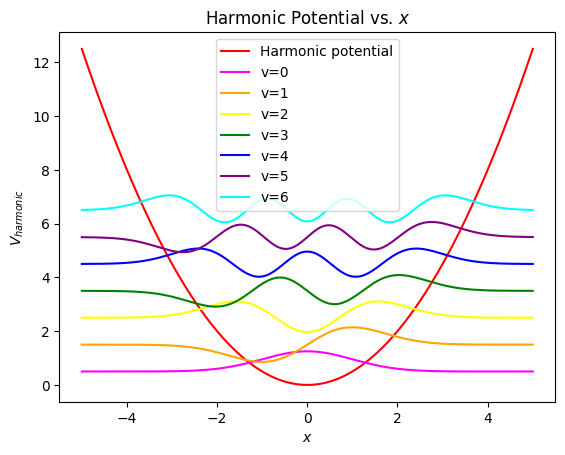

In [24]:
#### Plots

#creating lists for the plots' labels and colors
labels=['v=0','v=1','v=2','v=3','v=4','v=5','v=6']
colors=['magenta','orange','yellow','green','blue','purple','cyan']

#plotting the harmonic potential as before
plt.plot(_x, _harmpot(_x), color='red', label="Harmonic potential")
plt.title('Harmonic Potential vs. $x$')
plt.xlabel("$x$")
plt.ylabel("$V_{harmonic}$")
plt.show
#plotting the wave functions over the harmonic potential plot, on their respective energies
for i in range(0,7):
    _psi=sp.lambdify([x], psi[i])
    _x = np.linspace(-5.,5.,250)
    plt.plot(_x, _psi(_x)+evs(i), color=colors[i], label=labels[i])
    plt.legend()
    plt.show


### Expectations values

<div class="intro">

The expectation value of an observable $\Omega$ is given by
$$<\Omega >=\int_{-\infty}^{+\infty}{\Psi^*_v \Omega \Psi_v dx}$$   

<div class="exE">    
Show that, with the values chosen for the constants, $<x^2>=v+\frac{1}{2}$.

In [25]:
# insert your code here

def expect_value(f,x):
    """
    This function evaluates the expectation value of an operator x**2 with respect to a function f  
    input: -f: function
           -x: operator
    output: the expectation value of x**2 with respect to f
    """
    if np.imag(f)==0:
        expv=sp.integrate(f*(x**2)*f,(x,-sp.oo,sp.oo)).evalf(3)
    else:
        expv=sp.integrate(sp.conjugate(f)*(x**2)*f,(x,-sp.oo,sp.oo)).evalf(3)
    return expv

exp_val=[]
#evaluating and storing the expectation values with the previous defined function
for i in range(0,7):
    exp_val.insert(i,expect_value(psi[i],x))
    
#printing the levels, the expected value, and if they are the same as expected, according to the exercise
for i in range(0,7):
    if exp_val[i]==(i+(1/2)):
        print(f"\n\nv={i}\nExpected value:{exp_val[i]:.3f}")
        print("OK")
    else:
        print("not OK")




v=0
Expected value:0.500
OK


v=1
Expected value:1.500
OK


v=2
Expected value:2.500
OK


v=3
Expected value:3.500
OK


v=4
Expected value:4.500
OK


v=5
Expected value:5.500
OK


v=6
Expected value:6.500
OK


<div class="exE">
Search the nodes of the wavefunctions (<i>ie</i> solve $H_v(y)=0$) for different values of $v$ and make a plot of these nodes.

</div>

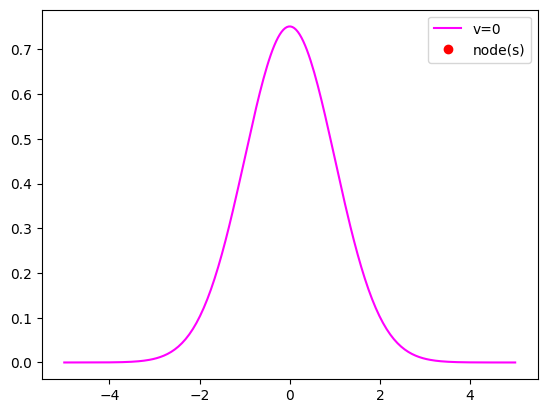

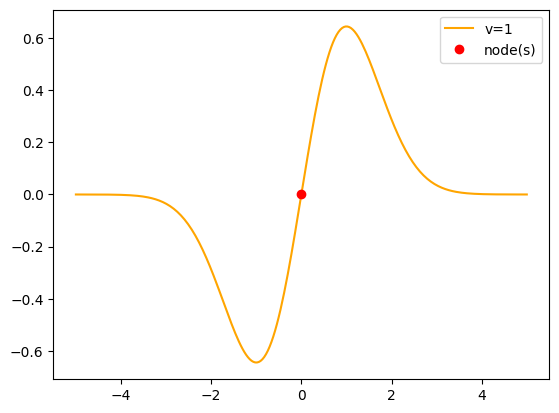

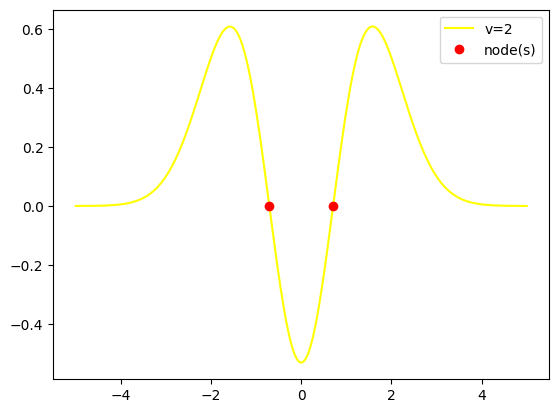

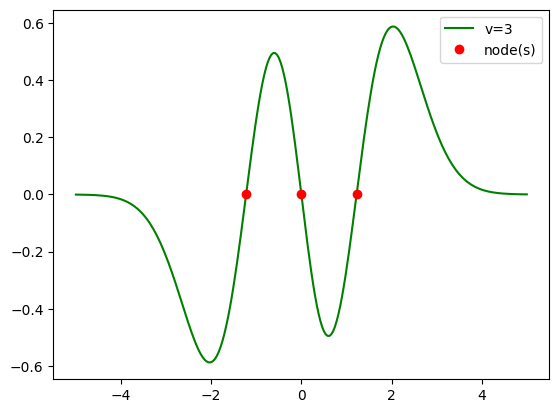

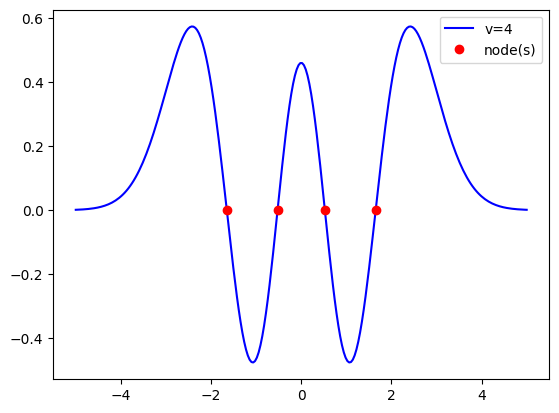

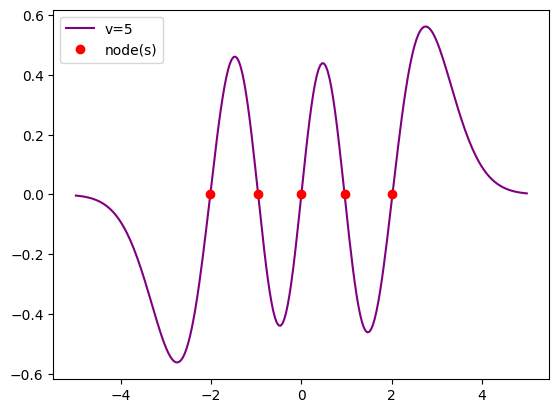

In [9]:
# insert your code here

#creating dictionary for the zeros to be plotted due to the diveregence of 
zeros={0:[],
       1:[0],
       2:[0,0], 
       3:[0,0,0],
       4:[0,0,0,0],
       5:[0,0,0,0,0]}

nodes={}


for i in range(0,6):
    H_solved=sp.solve(H[i],x)
    nodes[i]=H_solved


for i in range(0,6):
    _x = np.linspace(-5.,5.,250)
    _psi=sp.lambdify([x], psi[i])
    plt.plot(_x, _psi(_x), color=colors[i], label=labels[i])
    plt.plot(nodes[i], zeros[i], 'ro', label="node(s)")
    plt.legend()
    plt.show()




# End

In [10]:
vID.end(cwd0)

**End at:** Tuesday 05 December 2023, 19:23:48  
**Duration:** 00:00:11 107ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>